# **TASK 1**

<h2> VISUALIZING THE DISTRIBUTION OF POPULATION ACROSS COUNTRIES OVER THE PAST 6 DECADES </h2>

In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import plotly.express as px

<h3> World Bank's <a href="https://data.worldbank.org/indicator/SP.POP.TOTL">Total Population Dataset</a> has been used for analysis </h3>

In [33]:
# Reading the dataset
df = pd.read_csv('C:/Users/nisha/OneDrive/Desktop/DS/dataset1.csv')

In [35]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,...,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,2.820535e+07,2.839445e+07,2.884408e+07,2.953163e+07,3.022014e+07,3.093029e+07,3.171695e+07,3.249295e+07,3.329503e+07,3.413416e+07,...,7.563256e+07,7.679085e+07,7.795907e+07,7.915573e+07,8.034211e+07,8.151235e+07,8.262811e+07,8.366060e+07,8.467330e+07,8.573831e+07
std,9.783082e+07,9.708492e+07,9.800360e+07,1.004376e+08,1.028059e+08,1.052896e+08,1.082370e+08,1.110503e+08,1.139811e+08,1.171282e+08,...,2.213363e+08,2.236941e+08,2.260704e+08,2.285324e+08,2.308332e+08,2.330000e+08,2.349894e+08,2.367490e+08,2.384019e+08,2.399824e+08
min,9.443000e+03,1.021600e+04,1.101400e+04,1.183900e+04,1.269000e+04,1.356300e+04,1.454600e+04,1.574500e+04,1.707900e+04,1.844900e+04,...,5.221700e+04,5.136800e+04,5.044800e+04,4.946300e+04,4.842400e+04,4.732100e+04,4.618900e+04,4.503500e+04,4.427300e+04,4.391400e+04
25%,2.098490e+05,2.147880e+05,2.214840e+05,2.288140e+05,2.363620e+05,2.376940e+05,2.384940e+05,2.392380e+05,2.399050e+05,2.532610e+05,...,7.363570e+05,7.432740e+05,7.497610e+05,7.616640e+05,7.763130e+05,7.909860e+05,8.061660e+05,8.216250e+05,8.367740e+05,8.520750e+05
50%,3.707515e+06,3.784744e+06,3.864140e+06,3.945729e+06,4.029472e+06,4.115511e+06,4.204065e+06,4.295269e+06,4.389249e+06,4.486098e+06,...,8.835951e+06,8.916899e+06,8.994263e+06,9.068296e+06,9.140169e+06,9.211657e+06,9.287289e+06,9.302585e+06,9.228071e+06,9.178298e+06
75%,9.153489e+06,9.183948e+06,9.220578e+06,9.289770e+06,9.378113e+06,9.565147e+06,9.783147e+06,1.001003e+07,1.024778e+07,1.049449e+07,...,2.712834e+07,2.812772e+07,2.915475e+07,3.020863e+07,3.127353e+07,3.235359e+07,3.342849e+07,3.450377e+07,3.558899e+07,3.668420e+07
max,6.670700e+08,6.603300e+08,6.657700e+08,6.823350e+08,6.983550e+08,7.151850e+08,7.354000e+08,7.545500e+08,7.745100e+08,7.960250e+08,...,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,1.412175e+09,1.410710e+09


In [37]:
df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,106277
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,739108306
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,502789511
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,36684202
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689,2745972
6,Andorra,AND,"Population, total",SP.POP.TOTL,9443,10216,11014,11839,12690,13563,...,71621,71746,72540,73837,75013,76343,77700,79034,79824,80088
7,Arab World,ARB,"Population, total",SP.POP.TOTL,93359407,95760348,98268683,100892507,103618568,106444103,...,397922915,406501999,415077960,423664839,432545676,441467739,449228296,456520777,464684914,473272080
8,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,133426,140984,148877,157006,165305,173797,...,8835951,8916899,8994263,9068296,9140169,9211657,9287289,9365145,9441129,9516871
9,Argentina,ARG,"Population, total",SP.POP.TOTL,20349744,20680653,21020359,21364017,21708487,22053661,...,42669500,43131966,43590368,44044811,44494502,44938712,45376763,45808747,46234830,46654581


<h3> Checking for null values </h3>

In [43]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64

<h3> This Dataset is already cleaned, thus we can begin our analysis </h3>

<h3> 1. Population Distribution Throughout the Years </h3>

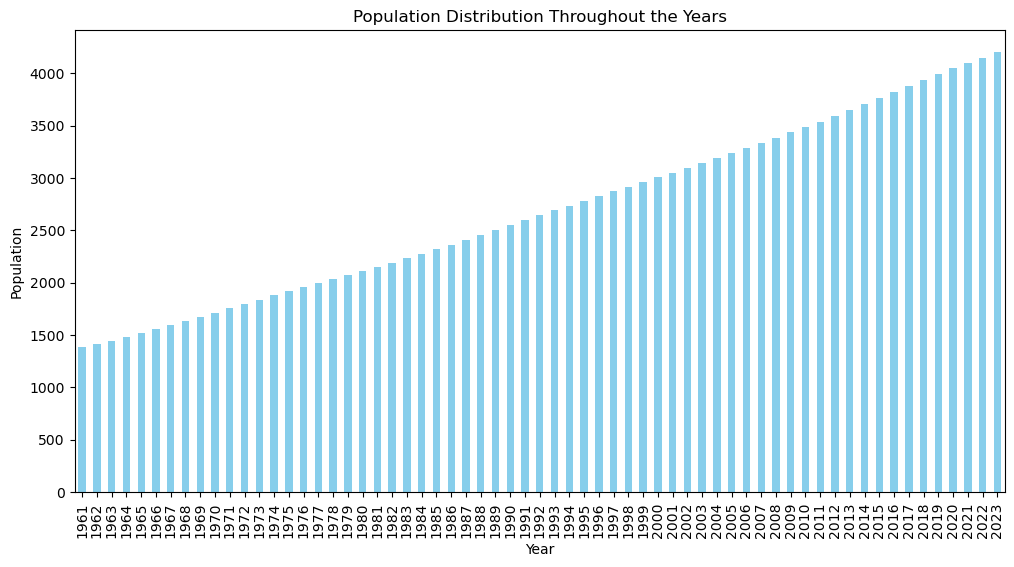

In [39]:
plt.figure(figsize=(12, 6))
population_by_year = df.sum()[5:] / 1000000 # Assuming the years are in columns starting from the second column
population_by_year.plot(kind='bar', color='skyblue')
plt.title('Population Distribution Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

<h3> We can thus conclude there was a significant exponential population increase over the last 60 years, also known as population explosion. </h3>

<h3>2. Population Distribution Countrywise </h3>

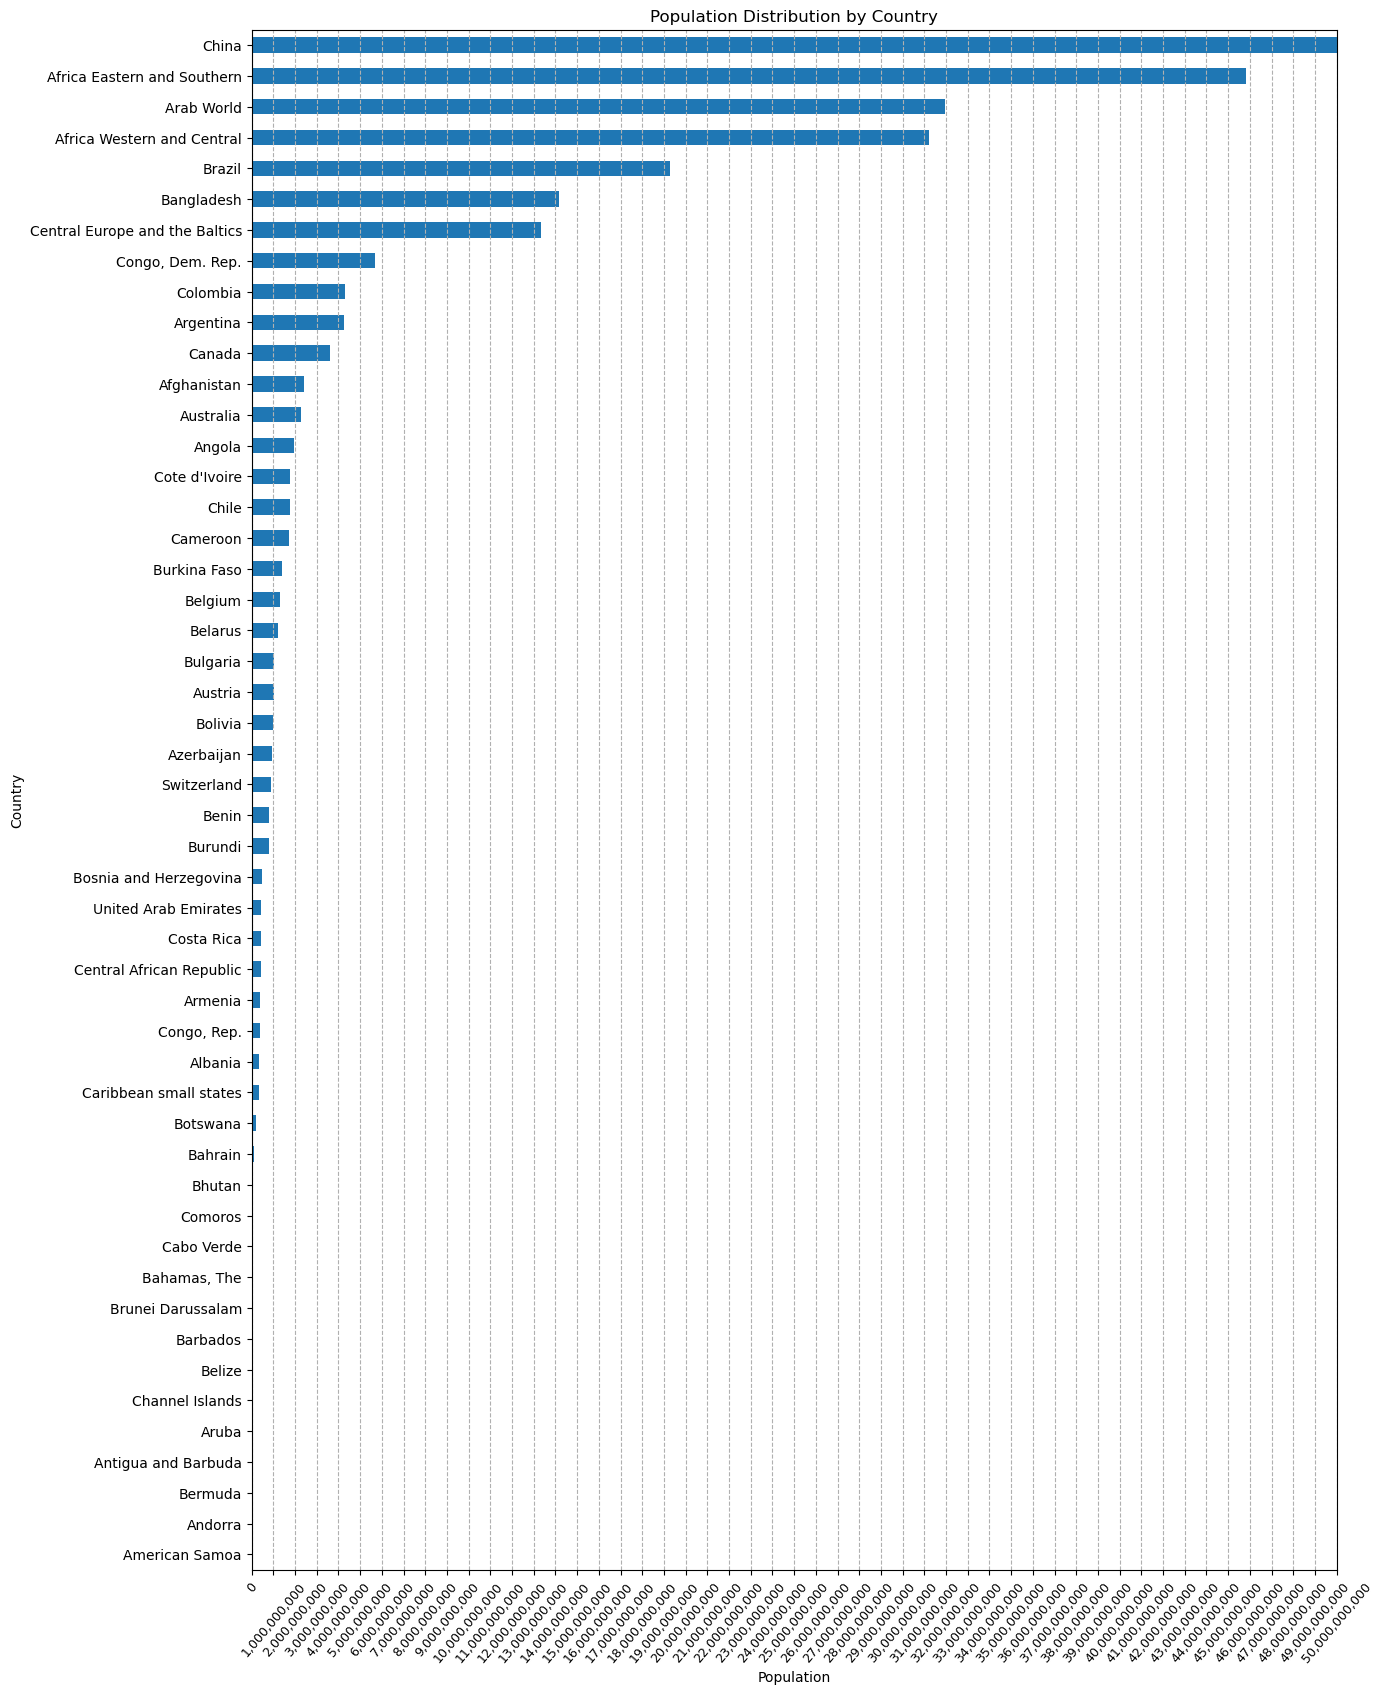

In [96]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0)

# Summing population across all year columns for each country
population_by_country = df.set_index('Country Name').sum(axis=1)

plt.figure(figsize=(14,20))
population_by_country.sort_values().plot(kind='barh')
plt.title('Population Distribution by Country')
plt.xlabel('Population')
plt.ylabel('Country')

plt.xlim(0, 50000000000)  # Example: limit to 50 billion

# Reduce tick frequency
plt.xticks(range(0, 50000000001, 1000000000))  # Example: ticks every 1 billion

# Rotate tick labels
plt.xticks(rotation=50)

# Increase font size
plt.xticks(fontsize=9)  # Adjust font size as needed

# Add gridlines
plt.grid(axis='x', linestyle='--')

# Format x-axis to include commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

<h3>From the above graph, we can see that China, Eastern and Southern Africa, Arab Countries, Central and Western Africa and Brazil are amongst the World's most populous countries. </h3>